<a href="https://colab.research.google.com/github/yimeiwen/FraudDetection/blob/main/Nature_Language_Processing_and_Neural_Network_Review_Star_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Document Clustering and Topic Modeling**

In [ ]:
!pip install PyDrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file = drive.CreateFile({'id':'192JMR7SIqoa14vrs7Z9BXO3iK89pimJL'})
file.GetContentFile('data.tsv') #tab-separated

#https://drive.google.com/file/d/192JMR7SIqoa14vrs7Z9BXO3iK89pimJL/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import nltk #Natural Language Toolkit
#import genism
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('punkt')  #Punkt Sentence Tokenizer

#Punkt This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.  
#It must be trained on a large collection of plain text in the target language before it can be used.
nltk.download('stopwords')
#The process of converting data to something a computer can understand is referred to as pre-processing. 
#One of the major forms of pre-processing is to filter out useless data. 
#In natural language processing, useless words (data), are referred to as stop words. 
#What are Stop words?
#Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore,
#both when indexing entries for searching and when retrieving them as the result of a search query. 
#We would not want these words to take up space in our database, or taking up valuable processing time. 
#For this, we can remove them easily, by storing a list of words that you consider to stop words. 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv('data.tsv',sep='\t', error_bad_lines=False)

b'Skipping line 8704: expected 15 fields, saw 22\nSkipping line 16933: expected 15 fields, saw 22\nSkipping line 23726: expected 15 fields, saw 22\n'
b'Skipping line 85637: expected 15 fields, saw 22\n'
b'Skipping line 132136: expected 15 fields, saw 22\nSkipping line 158070: expected 15 fields, saw 22\nSkipping line 166007: expected 15 fields, saw 22\nSkipping line 171877: expected 15 fields, saw 22\nSkipping line 177756: expected 15 fields, saw 22\nSkipping line 181773: expected 15 fields, saw 22\nSkipping line 191085: expected 15 fields, saw 22\nSkipping line 196273: expected 15 fields, saw 22\nSkipping line 196331: expected 15 fields, saw 22\n'
b'Skipping line 197000: expected 15 fields, saw 22\nSkipping line 197011: expected 15 fields, saw 22\nSkipping line 197432: expected 15 fields, saw 22\nSkipping line 208016: expected 15 fields, saw 22\nSkipping line 214110: expected 15 fields, saw 22\nSkipping line 244328: expected 15 fields, saw 22\nSkipping line 248519: expected 15 fields,

# error_bad_lines : boolean, default True

Lines with too many fields (e.g. a csv line with too many commas) will by default cause an exception to be raised, and no DataFrame will be returned. If False, then these “bad lines” will dropped from the DataFrame that is returned. (Only valid with C parser)

error_bad_lines=False    =====> Ignore rows with extra columns/drop bad lines

In [ ]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31


In [ ]:
df.dropna(subset=['review_body'],inplace=True)
#DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#Remove missing values in column "review_body"  drop rows that there are no value

# inplace = Ture

Inplace is a parameter accepted by a number of pandas methods which affects the behaviour of how the method runs.Using the inplace=True keyword in a pandas method changes the default behaviour such that the operation on the dataframe doesn’t return anything, it instead ‘modifies the underlying data’ (more on that later). It mutates the actual object which you apply it to.
This means that any other objects referencing this dataframe (such as slices) will now see the modified version of the data — not the original.

# inplace= False(default option)
Alternatively, when using inplace=False (which is the default behaviour) the dataframe operation returns a copy of the dataframe, leaving the original data intact.

# Count Vectorizer give number of frequency with respect to index of vocabulary where as tf-idf consider overall documents of weight of words.

In [ ]:
df.reset_index(inplace=True, drop=True)


DataFrame.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill=''）
Reset the index, or a level of it.
Reset the index of the DataFrame, and use the default one instead. If the DataFrame has a MultiIndex, this method can remove one or more levels.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960056 entries, 0 to 960055
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        960056 non-null  object
 1   customer_id        960056 non-null  int64 
 2   review_id          960056 non-null  object
 3   product_id         960056 non-null  object
 4   product_parent     960056 non-null  int64 
 5   product_title      960054 non-null  object
 6   product_category   960056 non-null  object
 7   star_rating        960056 non-null  int64 
 8   helpful_votes      960056 non-null  int64 
 9   total_votes        960056 non-null  int64 
 10  vine               960056 non-null  object
 11  verified_purchase  960056 non-null  object
 12  review_headline    960049 non-null  object
 13  review_body        960056 non-null  object
 14  review_date        960052 non-null  object
dtypes: int64(5), object(10)
memory usage: 109.9+ MB


In [ ]:
data=df.loc[:999,'review_body'].tolist()
#get first 999 lines content under Column name 'review_body" due to too many reviews in the profle, it is not needed

#DataFrame.iloc -----》Access group of rows and columns by integer position(s).
#https://towardsdatascience.com/how-to-use-loc-and-iloc-for-selecting-data-in-pandas-bd09cb4c3d79

loc is label-based, which means that you have to specify rows and columns based on their row and column labels.
iloc is integer position-based, so you have to specify rows and columns by their integer position values (0-based integer position).


## Pandas tolist() is used to convert a series to list. Initially the series is of type pandas.core.series.Series and applying tolist() method, it is converted to list data type.

In [ ]:
data # review——body content

['Absolutely love this watch! Get compliments almost every time I wear it. Dainty.',
 'I love this watch it keeps time wonderfully.',
 'Scratches',
 'It works well on me. However, I found cheaper prices in other places after making the purchase',
 "Beautiful watch face.  The band looks nice all around.  The links do make that squeaky cheapo noise when you swing it back and forth on your wrist which can be embarrassing in front of watch enthusiasts.  However, to the naked eye from afar, you can't tell the links are cheap or folded because it is well polished and brushed and the folds are pretty tight for the most part.<br /><br />I love the new member of my collection and it looks great.  I've had it for about a week and so far it has kept good time despite day 1 which is typical of a new mechanical watch",
 'i love this watch for my purpose, about the people complaining should of done their research better before buying. dumb people.',
 'for my wife and she loved it, looks great and a 

# Tokenizing and Stemming from NLTK
Load stopwords and stemmer function from NLTK library. Stop words are words like "a", "the", or "in" which don't convey significant meaning. Stemming is the process of breaking a word down into its root.

In [ ]:
stop_words= nltk.corpus.stopwords.words('english')  #engllish stopwords, not chinese or French
stop_words.append("'s")
stop_words.append("'m")

stop_words.append('watch')

print("We use "+ str(len(stop_words)) +" stop-word from nltk library.")
print(stop_words[:10]) #first ten stopwords

We use 182 stop-word from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
data[0:5]

['Absolutely love this watch! Get compliments almost every time I wear it. Dainty.',
 'I love this watch it keeps time wonderfully.',
 'Scratches',
 'It works well on me. However, I found cheaper prices in other places after making the purchase',
 "Beautiful watch face.  The band looks nice all around.  The links do make that squeaky cheapo noise when you swing it back and forth on your wrist which can be embarrassing in front of watch enthusiasts.  However, to the naked eye from afar, you can't tell the links are cheap or folded because it is well polished and brushed and the folds are pretty tight for the most part.<br /><br />I love the new member of my collection and it looks great.  I've had it for about a week and so far it has kept good time despite day 1 which is typical of a new mechanical watch"]

In [ ]:
from nltk.stem.snowball import SnowballStemmer
#from nltk.stem import WordNetLemmatizer
stemmer = SnowballStemmer('english')
def tokenization_and_stemming(text):
  tokens=[]
  #exclude stop words and tokenize the document, generate a list of string
  for word in nltk.word_tokenize(text):
    if word.lower() not in stop_words:
      tokens.append(word.lower())
  filtered_tokens = []

    # filter out any tokens not containing letters(eg, numeric tokens, raw punctuation)
  for token in tokens:
    if token.isalpha():
      filtered_tokens.append(token)

    #Stemming
  stems = [stemmer.stem(t) for t in filtered_tokens]
  return stems


The snowballstemmer module has two functions.

The snowballstemmer.algorithms function returns a list of available algorithm names.

The snowballstemmer.stemmer function takes an algorithm name and returns a Stemmer object.

Stemmer objects have a Stemmer.stemWord(word) method and a Stemmer.stemWords(word[]) method.



In [ ]:
tokenization_and_stemming(data[0]) #showing what the first review look at after tokenization

['absolut',
 'love',
 'get',
 'compliment',
 'almost',
 'everi',
 'time',
 'wear',
 'dainti']

In [ ]:
data[0]

'Absolutely love this watch! Get compliments almost every time I wear it. Dainty.'

# TF-IDF
Term Frequency Inverse Document Frequency

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#define vectorizer parameters
#TfidfVectorizer will help us to create tf-idf matrix
#max_df: maximum document frequency for the given word
#min_df: minimum document frequency for the given word
# max_features: maximum number of words
# use_idf: if not true, we only calculate tf
# stop_words : built-in stop words
# tokenizer: how to tokenize the document
# ngram_range: (min_value, max_value), eg. (1, 3) means the result will include 1-gram, 2-gram, 3-gram
tfidf_model = TfidfVectorizer(max_df =0.99, max_features=1000,
                              min_df = 0.01, stop_words=stop_words,
                              use_idf = True, tokenizer=tokenization_and_stemming, ngram_range=(1,1))
tfidf_matrix = tfidf_model.fit_transform(data)
#fit the vectorizer to synopses(a brief summary or general survey of something/an outline of the plot of a book, play, movie, or episode of a television show/概要)
print("In total, there are " +str(tfidf_matrix.shape[0])+ " review and " + str(tfidf_matrix.shape[1])+ ' terms.')


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'might', 'must', 'need', 'sha', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)


In total, there are 1000 review and 276 terms.


In [ ]:
tfidf_matrix

<1000x276 sparse matrix of type '<class 'numpy.float64'>'
	with 8048 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_matrix.toarray()
#todense()
#toarray returns an ndarray; todense returns a matrix. If you want a matrix, use todense; otherwise, use toarray.

array([[0.        , 0.43786652, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
print(type(tfidf_matrix.toarray()))

<class 'numpy.ndarray'>


In [ ]:
tfidf_matrix.todense()



matrix([[0.        , 0.43786652, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
print(type(tfidf_matrix.todense()))

<class 'numpy.matrix'>


In [ ]:
tf_selected_words = tfidf_model.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tf_selected_words

['abl',
 'absolut',
 'accur',
 'actual',
 'adjust',
 'alarm',
 'almost',
 'alreadi',
 'also',
 'alway',
 'amaz',
 'amazon',
 'anoth',
 'arm',
 'around',
 'arriv',
 'automat',
 'awesom',
 'back',
 'bad',
 'band',
 'batteri',
 'beauti',
 'best',
 'better',
 'big',
 'bit',
 'black',
 'blue',
 'bought',
 'box',
 'br',
 'bracelet',
 'brand',
 'break',
 'bright',
 'broke',
 'button',
 'buy',
 'ca',
 'came',
 'case',
 'casio',
 'chang',
 'cheap',
 'clasp',
 'classi',
 'clock',
 'color',
 'come',
 'comfort',
 'compliment',
 'cool',
 'cost',
 'could',
 'crown',
 'crystal',
 'dark',
 'date',
 'daughter',
 'day',
 'deal',
 'definit',
 'deliveri',
 'design',
 'dial',
 'differ',
 'difficult',
 'disappoint',
 'display',
 'dress',
 'durabl',
 'easi',
 'easili',
 'end',
 'enough',
 'even',
 'ever',
 'everi',
 'everyday',
 'everyth',
 'exact',
 'excel',
 'expect',
 'expens',
 'face',
 'fair',
 'far',
 'fast',
 'featur',
 'feel',
 'fell',
 'find',
 'fine',
 'finish',
 'first',
 'fit',
 'function',
 'gav

# K-means clustering

In [ ]:
#K-means clustering
from sklearn.cluster import KMeans

num_clusters= 5
#number of clusters
km=KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters= km.labels_.tolist()

# ndarray.tolist()
Return the array as an a.ndim-levels deep nested list of Python scalars.

Return a copy of the array data as a (nested) Python list. Data items are converted to the nearest compatible builtin Python type, via the item function.



#Analyze K-means Result

In [ ]:
#create DataFrame films from all of the input files
product = {'review': df[:1000].review_body, 'cluster': clusters}
frame = pd.DataFrame(product, columns = ['review','cluster'])

In [ ]:
frame.head(10)

,review,cluster
0,Absolutely love this watch! Get compliments al...,2
1,I love this watch it keeps time wonderfully.,2
2,Scratches,0
3,"It works well on me. However, I found cheaper ...",0
4,Beautiful watch face. The band looks nice all...,0
5,"i love this watch for my purpose, about the pe...",2
6,"for my wife and she loved it, looks great and ...",3
7,I was about to buy this thinking it was a Swis...,0
8,Watch is perfect. Rugged with the metal &#34;B...,3
9,Great quality and build.<br />The motors are r...,0


In [ ]:
print("Number of reviews included in each clusters:")
frame['cluster'].value_counts().to_frame()

Number of reviews included in each clusters:


,cluster
0,657
2,121
3,88
1,73
4,61


In [ ]:
km.cluster_centers_
# tf-idf value for 239 features, represent distances to the cluster centroid 
#the higher the tf-idf value, means this centriod are more likely to be able to present the cluster


array([[0.00519443, 0.00488267, 0.00334032, ..., 0.01674688, 0.01276594,
        0.0052732 ],
       [0.        , 0.        , 0.        , ..., 0.00843302, 0.        ,
        0.        ],
       [0.        , 0.03268569, 0.        , ..., 0.0149306 , 0.00522193,
        0.00376556],
       [0.00327021, 0.        , 0.        , ..., 0.        , 0.01338044,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00797103, 0.        ,
        0.        ]])

In [ ]:
km.cluster_centers_.shape

(5, 276)

In [ ]:
print('<Document clustering result by K-means>')
#use the first six largest number to represent the cluster
order_centroids = km.cluster_centers_.argsort()[:,::-1]

Cluster_keywords_summary= {}
for i in range(num_clusters):
  print('Cluster '+str(i)+' words:', end='')
  Cluster_keywords_summary[i]=[]
  for ind in order_centroids[i,:6]: #replace 6 with n words per cluster
    Cluster_keywords_summary[i].append(tf_selected_words[ind])
    print(tf_selected_words[ind] + ",", end="")
  print()
  cluster_reviews=frame[frame.cluster==i].review.tolist()
  print('Cluster '+str(i) + ' reviews (' +str(len(cluster_reviews)) + " reviews): ")
  print(','.join(cluster_reviews))
  print()



<Document clustering result by K-means>
Cluster 0 words:like,look,work,band,br,time,
Cluster 0 reviews (657 reviews): 
Scratches,It works well on me. However, I found cheaper prices in other places after making the purchase,Beautiful watch face.  The band looks nice all around.  The links do make that squeaky cheapo noise when you swing it back and forth on your wrist which can be embarrassing in front of watch enthusiasts.  However, to the naked eye from afar, you can't tell the links are cheap or folded because it is well polished and brushed and the folds are pretty tight for the most part.<br /><br />I love the new member of my collection and it looks great.  I've had it for about a week and so far it has kept good time despite day 1 which is typical of a new mechanical watch,I was about to buy this thinking it was a Swiss Army Infantry watch-- the description uses the words infantry and army--- when I realized it must be a fraud for $12.00. This should not be offered on Amazon-- i

# Topic Modeling Latent Dirichlet Allocation Scikit-learn
[link text](https://https://machinelearninggeek.com/latent-dirichlet-allocation-using-scikit-learn/)
LDA is an unsupervised learning algorithm that discovers a blend of different themes or topics in a set of documents.
In natural language processing, the latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. For example, if observations are words collected into documents, it posits that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics. LDA is an example of a topic model.

In [ ]:
#use LDA for clustering
from sklearn.decomposition import LatentDirichletAllocation
lda=LatentDirichletAllocation(n_components=5)

In [ ]:
lda_output=lda.fit_transform(tfidf_matrix)
print(lda_output.shape)
print(lda_output)

(1000, 5)
[[0.77942997 0.05506289 0.05694326 0.05380203 0.05476185]
 [0.0749036  0.07726616 0.07431442 0.69820603 0.0753098 ]
 [0.2        0.2        0.2        0.2        0.2       ]
 ...
 [0.10000022 0.59980393 0.10000041 0.10006249 0.10013294]
 [0.0625643  0.74835887 0.06211232 0.06222289 0.06474162]
 [0.0677184  0.06908541 0.06772959 0.06878918 0.72667742]]


In [ ]:
# topics and words matrix
topic_word = lda.components_
print(topic_word.shape)
print(topic_word)

(5, 276)
[[ 3.07547106  7.35686062  0.20040428 ...  0.20241539  1.63588116
   0.20264239]
 [ 0.20155904  0.2010425   0.20024997 ...  0.20128804  0.20055104
   0.20065116]
 [ 0.20130806  0.2019115   0.20012793 ...  0.20134012  0.20065194
   0.20010952]
 [ 0.20267807  0.20135162  1.18510734 ...  2.97659958  1.0622134
   0.20100847]
 [ 1.01949998  0.20171868  1.40869804 ... 11.32950564  8.09725444
   4.11571222]]


In [ ]:
# column names
topic_names = ["Topic" + str(i) for i in range(lda.n_components)]

# index names
doc_names = ["Doc" + str(i) for i in range(len(data))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names, index=doc_names)

# get dominant topic for each document
topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['topic'] = topic

df_document_topic.head(10)

,Topic0,Topic1,Topic2,Topic3,Topic4,topic
Doc0,0.78,0.06,0.06,0.05,0.05,0
Doc1,0.07,0.08,0.07,0.70,0.08,3
Doc2,0.20,0.20,0.20,0.20,0.20,0
Doc3,0.32,0.06,0.06,0.06,0.51,4
Doc4,0.04,0.04,0.04,0.04,0.85,4
Doc5,0.08,0.08,0.08,0.08,0.69,4
Doc6,0.06,0.07,0.06,0.74,0.06,3
Doc7,0.07,0.06,0.06,0.06,0.75,4
Doc8,0.77,0.04,0.09,0.04,0.04,0
Doc9,0.06,0.06,0.06,0.06,0.77,4


In [ ]:
df_document_topic['topic'].value_counts().to_frame()

,topic
4,355
0,193
1,186
3,181
2,85


In [ ]:
# topic word matrix
print(lda.components_)
df_topic_words = pd.DataFrame(lda.components_)

[[ 3.07547106  7.35686062  0.20040428 ...  0.20241539  1.63588116
   0.20264239]
 [ 0.20155904  0.2010425   0.20024997 ...  0.20128804  0.20055104
   0.20065116]
 [ 0.20130806  0.2019115   0.20012793 ...  0.20134012  0.20065194
   0.20010952]
 [ 0.20267807  0.20135162  1.18510734 ...  2.97659958  1.0622134
   0.20100847]
 [ 1.01949998  0.20171868  1.40869804 ... 11.32950564  8.09725444
   4.11571222]]


In [ ]:
#column and index
df_topic_words.columns = tfidf_model.get_feature_names()
df_topic_words.index = topic_names
df_topic_words.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abl,absolut,accur,actual,adjust,alarm,almost,alreadi,also,alway,...,wish,within,without,work,worn,worth,would,wrist,year,yet
Topic0,3.075471,7.356861,0.200404,0.200843,0.935790,0.206091,0.898877,1.883098,2.236945,0.200280,...,2.220785,2.393961,1.306450,6.378813,2.862961,2.694866,1.498657,0.202415,1.635881,0.202642
Topic1,0.201559,0.201042,0.200250,0.202225,0.201483,0.200068,0.200852,2.316300,0.200270,0.200183,...,0.200435,0.200773,0.200653,2.174520,0.201427,0.200075,1.174930,0.201288,0.200551,0.200651
Topic2,0.201308,0.201911,0.200128,0.200838,0.200359,4.949479,2.798015,0.200750,0.201126,0.200908,...,0.200594,0.905478,0.566852,17.495642,0.546156,0.201255,0.201157,0.201340,0.200652,0.200110
Topic3,0.202678,0.201352,1.185107,0.200118,0.201579,0.206980,0.275092,0.201576,1.830918,0.200665,...,0.643301,0.535635,0.529277,4.072578,0.200054,0.203298,0.471816,2.976600,1.062213,0.201008
Topic4,1.019500,0.201719,1.408698,4.806444,4.530245,0.212587,2.963983,1.027517,3.861932,3.637212,...,0.896917,0.201920,3.599972,7.733018,0.206320,3.255037,11.422511,11.329506,8.097254,4.115712


In [ ]:
def print_topic_words(tfidf_model,lda_model, n_words):
  words=np.array(tfidf_model.get_feature_names())
  topic_words = []
  #for each topic, we have words weight
  for topic_words_weights in lda_model.components_:
    top_words= topic_words_weights.argsort()[::-1][:n_words]
    topic_words.append(words.take(top_words))
  return topic_words

topic_keywords = print_topic_words(tfidf_model=tfidf_model, lda_model=lda, n_words=15)        

df_topic_words = pd.DataFrame(topic_keywords)
df_topic_words.columns = ['Word '+str(i) for i in range(df_topic_words.shape[1])]
df_topic_words.index = ['Topic '+str(i) for i in range(df_topic_words.shape[0])]
df_topic_words

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,nice,batteri,day,get,time,broke,use,one,light,two,absolut,buy,work,ever,back
Topic 1,good,love,price,great,awesom,nice,qualiti,fast,look,product,deliveri,seller,realli,recommend,exact
Topic 2,beauti,perfect,work,expect,fit,well,bad,everyth,came,alarm,sturdi,instruct,wear,light,classi
Topic 3,great,excel,look,product,love,wife,amaz,pretti,time,husband,big,feel,price,littl,keep
Topic 4,like,br,band,look,love,wear,would,wrist,time,much,face,one,well,great,realli


# **2.TensorFlow Neural Network using Customer Review to predict Star Rating**

Text(0.5, 1.0, 'review to rating')

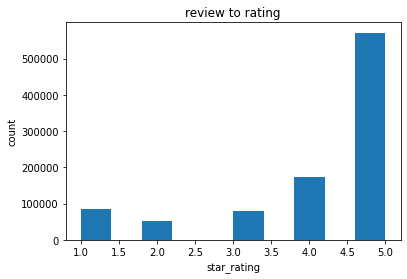

In [ ]:
plt.hist(df.star_rating)
plt.xlabel('star_rating')
plt.ylabel('count')
plt.title('review to rating')

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
df['label']=(df.star_rating>=3).astype(int)
df=df[['review_body','star_rating','label']]
len(df)

960056

datasplit into training testing and validation

In [ ]:
train,val,test=np.split(df.sample(frac=1),[int(0.8*len(df)),int(0.9*len(df))])
len(train),len(val),len(test)

(768044, 96006, 96006)

In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
  df=dataframe.copy()
  labels=df.pop('label')
  df=df['review_body']
  ds=tf.data.Dataset.from_tensor_slices((df,labels))
  if shuffle:
    ds=ds.shuffle(buffer_size=len(dataframe))
  ds=ds.batch(batch_size)
  ds=ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [ ]:
train_data=df_to_dataset(train)
valid_data=df_to_dataset(val)
test_data=df_to_dataset(test)
len(train_data),len(valid_data),len(test_data)


(751, 94, 94)

In [ ]:
list(train_data)[0]

(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b"I gave a similar style Citizen Eco-drive watch to my husband several years ago.      Note, the Stilleto and a few other 'models' in the Citizen eco-drive line appear to have the sapphire dial covers instead of mineral glass (I assume that the 'mineral glass' is something like quartz, which is nicer and harder than glass.) However, this review is concerning the models that have sapphire dial covers, which we have found are superb for someone who has otherwise been very hard on his watches.     This is a quiet understated style that was exactly to our taste as we both disliked big watches with lots of extra dials. Because my husband works in a lab, he was replacing a simple cheap casio watch (with a clean analog dial) every few years after the glass dial became too scratched. A few years ago, when it was ready to be replaced, I wanted to give him something nicer and the Eco-drive seemed very appropriate because the whole concept 

# Embedding + Model

In [ ]:
embedding='https://tfhub.dev/google/nnlm-en-dim128/2'
hub_layer=hub.KerasLayer(embedding,dtype=tf.string,trainable=True)

Transfer text into vectors(numbers) using TensorFlow nnlm embedding

In [ ]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 128), dtype=float32, numpy=
array([[ 0.35000175, -0.10203085,  0.02879166, ..., -0.0231524 ,
        -0.08411931,  0.10483649],
       [ 0.54467887,  0.05257927,  0.2721308 , ..., -0.01736205,
        -0.05197517, -0.02661743],
       [ 0.9049628 ,  0.10555051,  0.00182365, ..., -0.12881877,
        -0.10575271,  0.02290615],
       ...,
       [-0.18644567,  0.01757552,  0.18755189, ...,  0.05608964,
        -0.20255372,  0.02361888],
       [ 0.35879326, -0.04200901, -0.02205304, ...,  0.06541987,
         0.12115029,  0.11060551],
       [ 1.07302   , -0.07297475,  0.07304976, ..., -0.20355679,
         0.0825643 ,  0.12518169]], dtype=float32)>

# Build Model using TensorFlow

In [ ]:
model=tf.keras.Sequential()
model.add(hub_layer) #add hub_layer
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [ ]:
model.evaluate(train_data)

751/751 [==============================] - 19s 22ms/step - loss: 0.6479 - accuracy: 0.8517


[0.6479259729385376, 0.8517259359359741]

In [ ]:
model.evaluate(valid_data)

94/94 [==============================] - 2s 20ms/step - loss: 0.6479 - accuracy: 0.8507


[0.6478509306907654, 0.8507072329521179]

In [ ]:
history=model.fit(train_data,epochs=10,validation_data=valid_data)

Epoch 1/10
751/751 [==============================] - 1184s 2s/step - loss: 0.2090 - accuracy: 0.9130 - val_loss: 0.1726 - val_accuracy: 0.9272
Epoch 2/10
751/751 [==============================] - 1118s 1s/step - loss: 0.1624 - accuracy: 0.9320 - val_loss: 0.1688 - val_accuracy: 0.9281
Epoch 3/10
751/751 [==============================] - 1123s 1s/step - loss: 0.1511 - accuracy: 0.9368 - val_loss: 0.1708 - val_accuracy: 0.9279
Epoch 4/10
751/751 [==============================] - 1112s 1s/step - loss: 0.1417 - accuracy: 0.9410 - val_loss: 0.1767 - val_accuracy: 0.9258
Epoch 5/10
751/751 [==============================] - 1115s 1s/step - loss: 0.1330 - accuracy: 0.9449 - val_loss: 0.1832 - val_accuracy: 0.9254
Epoch 6/10
751/751 [==============================] - 1117s 1s/step - loss: 0.1235 - accuracy: 0.9491 - val_loss: 0.1925 - val_accuracy: 0.9233
Epoch 7/10
751/751 [==============================] - 1104s 1s/step - loss: 0.1136 - accuracy: 0.9535 - val_loss: 0.2086 - val_accuracy:

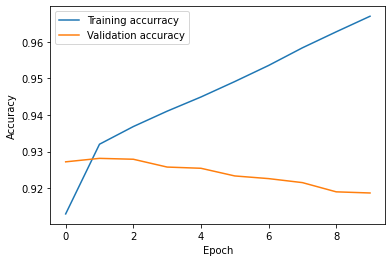

In [ ]:
plt.plot(history.history['accuracy'],label='Training accurracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

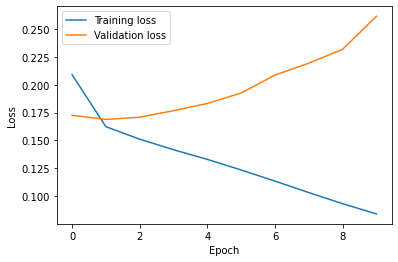

In [ ]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Build a better Neural Network model by adding dropout layer since pervious model tends to overfit

In [ ]:
model=tf.keras.Sequential()
model.add(hub_layer) #add hub_layer
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
history=model.fit(train_data,epochs=5,validation_data=valid_data)

Epoch 1/5
751/751 [==============================] - 1031s 1s/step - loss: 0.2409 - accuracy: 0.9040 - val_loss: 0.1810 - val_accuracy: 0.9239
Epoch 2/5
751/751 [==============================] - 1036s 1s/step - loss: 0.1811 - accuracy: 0.9278 - val_loss: 0.1798 - val_accuracy: 0.9245
Epoch 3/5
751/751 [==============================] - 1039s 1s/step - loss: 0.1706 - accuracy: 0.9320 - val_loss: 0.1811 - val_accuracy: 0.9242
Epoch 4/5
751/751 [==============================] - 1040s 1s/step - loss: 0.1632 - accuracy: 0.9347 - val_loss: 0.1850 - val_accuracy: 0.9240
Epoch 5/5
751/751 [==============================] - 1059s 1s/step - loss: 0.1579 - accuracy: 0.9361 - val_loss: 0.1864 - val_accuracy: 0.9243


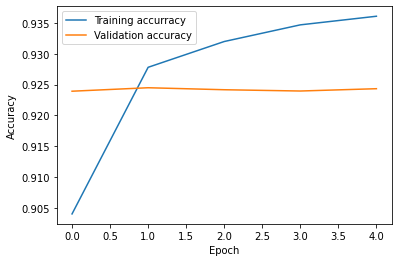

In [ ]:
plt.plot(history.history['accuracy'],label='Training accurracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

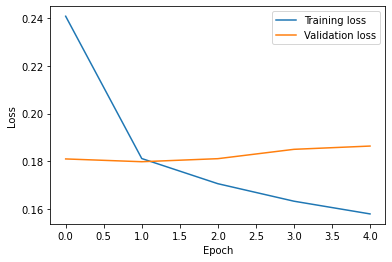

In [ ]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Build a LSTM model

Create an encoder for text

In [ ]:
encoder=tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text,label: text))
vocab=np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'i', 'it', 'a', 'and', 'watch', 'to', 'is',
       'this', 'for', 'of', 'my', 'in', 'that', 'but', 'on', 'was',
       'with'], dtype='<U14')

encoder to transfer text to number

In [ ]:
model=tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=32,
        mask_zero=True
    ),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.evaluate(train_data)


751/751 [==============================] - 1545s 2s/step - loss: 0.6931 - accuracy: 0.5232


[0.6931310296058655, 0.5232330560684204]

In [ ]:
model.evaluate(valid_data)

94/94 [==============================] - 193s 2s/step - loss: 0.6931 - accuracy: 0.5240


[0.6931214928627014, 0.5239776968955994]

In [ ]:
historyLSTM=model.fit(train_data,epochs=5,validation_data=valid_data)

Epoch 1/5
751/751 [==============================] - 3099s 4s/step - loss: 0.1892 - accuracy: 0.9237 - val_loss: 0.1549 - val_accuracy: 0.9357
Epoch 2/5
751/751 [==============================] - 2574s 3s/step - loss: 0.1522 - accuracy: 0.9373 - val_loss: 0.1476 - val_accuracy: 0.9373
Epoch 3/5
751/751 [==============================] - 2593s 3s/step - loss: 0.1438 - accuracy: 0.9406 - val_loss: 0.1460 - val_accuracy: 0.9386
Epoch 4/5
751/751 [==============================] - 2519s 3s/step - loss: 0.1385 - accuracy: 0.9426 - val_loss: 0.1446 - val_accuracy: 0.9392
Epoch 5/5
751/751 [==============================] - 2549s 3s/step - loss: 0.1341 - accuracy: 0.9445 - val_loss: 0.1433 - val_accuracy: 0.9394


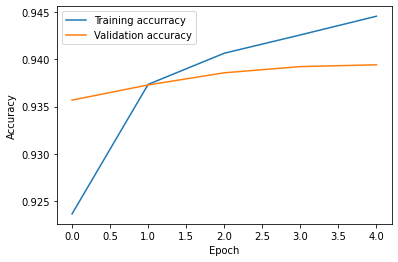

In [ ]:
plt.plot(historyLSTM.history['accuracy'],label='Training accurracy')
plt.plot(historyLSTM.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

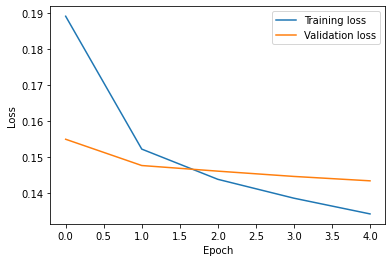

In [ ]:
plt.plot(historyLSTM.history['loss'],label='Training loss')
plt.plot(historyLSTM.history['val_loss'],label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()